In [4]:
!pip install geopandas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
df = pd.read_csv("test.csv")

        STATE_NAME  COUNT
0          Alabama     42
1           Alaska     56
2          Arizona    229
3         Arkansas     43
4       California   3420
5         Colorado    245
6      Connecticut    166
7         Delaware     25
8          Florida    843
9          Georgia    768
10          Hawaii     59
11           Idaho    140
12        Illinois   1160
13         Indiana    415
14            Iowa    221
15          Kansas    163
16        Kentucky    205
17       Louisiana     47
18           Maine     82
19        Maryland    545
20   Massachusetts    742
21        Michigan   1163
22       Minnesota    791
23     Mississippi     62
24        Missouri    256
25         Montana     70
26        Nebraska     68
27          Nevada     85
28   New Hampshire     88
29      New Jersey    709
30      New Mexico     86
31        New York   1556
32  North Carolina    527
33    North Dakota    105
34            Ohio   1386
35        Oklahoma     79
36          Oregon   1134
37    Pennsy

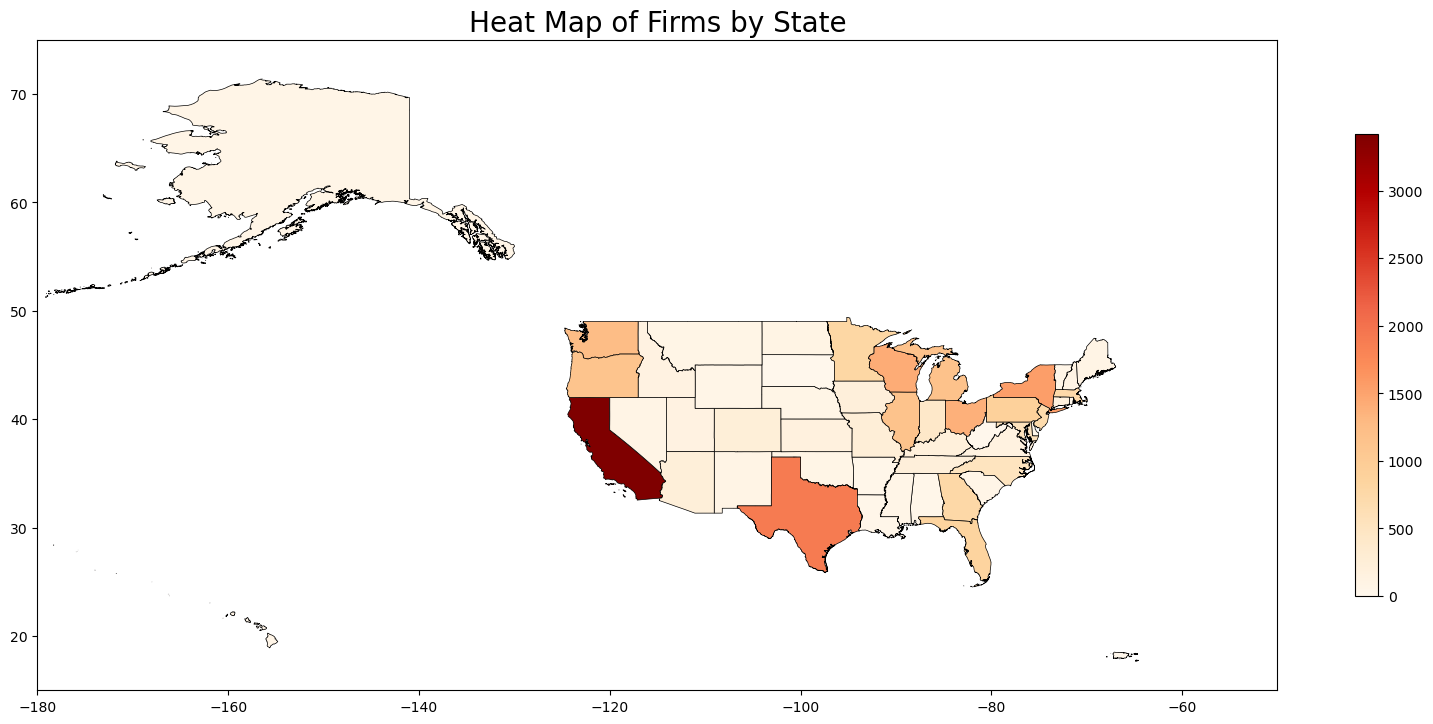

In [2]:
#Looking at the geospatial distribution of the recall data from FDA website
row_count = len(df)
us_states = gpd.read_file('cb_2024_us_state_500k/cb_2024_us_state_500k.shp')

state_counts = df.groupby('FIRMSTATEPRVNCNAM').size().reset_index(name='COUNT')

state_counts = state_counts[state_counts['FIRMSTATEPRVNCNAM'] != 'FIRMSTATEPRVNCNAM']
state_counts.columns = ['STATE_NAME', 'COUNT']
print(state_counts)

merged = us_states.merge(state_counts, left_on='NAME', right_on='STATE_NAME', how='left')
merged['COUNT'] = merged['COUNT'].fillna(0)

# Create a larger plot
fig, ax = plt.subplots(1, 1, figsize=(20, 20))  # Increased from (15, 10)

merged.plot(
    column='COUNT',
    ax=ax,
    legend=True,
    legend_kwds={'shrink': 0.3},
    cmap='OrRd',       # Choose color map
    edgecolor='black',
    linewidth=0.5
)
ax.set_xlim(-180, -50)
ax.set_ylim(15, 75)

ax.set_title('Heat Map of Firms by State', fontsize=20)
ax.axis('on')  # Hides axes

plt.show()

In [13]:
## Distribution of Recall Distribution by State
# Split and explode the distribution column
states = df['DISTRIBUTION'].str.split(',').explode()
# if comma at end of string, remove it
states = states.str.strip()  # Remove leading/trailing whitespace
states = states[states != '']  # Remove empty strings



# Count occurrences
state_counts = states.value_counts().reset_index()
state_counts.columns = ['state', 'count']

import plotly.express as px

fig = px.choropleth(
    state_counts,
    locations='state',
    locationmode='USA-states',
    color='count',
    scope='usa',
    color_continuous_scale='Reds'
)
# title = 'Distribution of Recalls by State'
fig.update_layout(
    title_text='Distribution of Recalls by State',
    title_x=0.5,  # Center the title
    geo=dict(
        scope='usa',
        showland=True,
        landcolor='white',
        subunitcolor='black',
        countrycolor='black'
    )
)
fig.show()